## Filtragem de um sinal

In [155]:
from IPython.core.pylabtools import figsize

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Carrega pacotes 

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, log10
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import square, convolve, lfilter_zi, filtfilt
import pandas as pd

pd.set_option("display.precision", 2)
figsize(10, 3)


In [156]:
def FIR_passaBaixa(Ωc, N):
    """
    Ωc : Frequência de corte do filtro (rad)
    N  : Ordem do filtro 
    
    """
    α = (N-1)/2
    
    # alocação de variáveis
    
    h = np.zeros((N,1)); #Resposta ao impulso do filtro, coeficientes do filtro

    # calcula dos coeficientes do filtro

    for n in range(0,N):
        if n == α:
            h[n] = Ωc/np.pi
        else:
            h[n] = sin(Ωc*(n-α))/(np.pi*(n-α))

    return h


Filtros digitais são sistemas Lineares Invariantes ao Deslocamento. Portanto, a saída de uma operação de filtragem pode ser obitida através da operação de convolução entre o sinal de entrada e a resposta ao impulso do filtro. Essa operação é expressa pela seguinte equação:

$$ y(n)=x(n)* h(n) $$

Vamos agora analisar o efeito de um filtragem passa baixa sobre um sinal de onda quadrada. Esse sinal será gerado através da equação de síntese da série trigonométrica de Fourier, utilizando para tal as três principais componentes (conforme foi abordado no experimento 1). Um filtro passa baixa com frequência de corte de $fc Hz$ é utilizado para filtrar as componentes do sinal de entrada que possuirem frequência fundamental maior que a frequência de corte do filtro. 


In [157]:
# Geração de sinal do sinal de entrada

f0 = 125     # Frequência fundamental
fs = 8000  # Frequência de amostragem
T = 1/fs # Período de amostragem

t = np.arange(0, 40e-3, 1/fs)
π = np.pi
ω0=2*π*f0

x   = (4/π)*(sin(ω0*t) + sin(3*ω0*t)/3 + sin(5*ω0*t)/5) # onda quadrada com frequência fundamental f0 

# Projeto do filtro passa baixa

N = 250 # Ordem do filtro
fc = 150  # frequencia de corte do filtro em Hz
ωc=2*π*fc # frequencia de corte do filtro em rad/s
Ωc = ωc*T # frequencia de corte do filtro digital em rad

# Calculo da resposta em Frequencia de filtro
h = FIR_passaBaixa(Ωc, N)
th = np.arange(0,N*T, T)

# Calculo do sinal filtrado, através da operação de convloção entre h(n) e x(n)
h = h.flatten()
y = convolve(x,h)
Nc = np.size(y)
ty = np.arange(0,Nc*T, T)


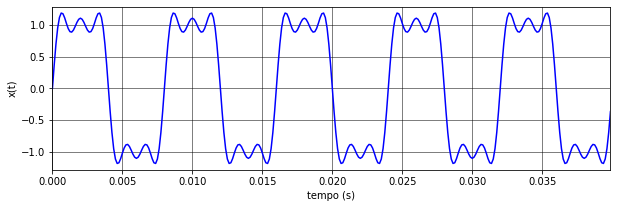

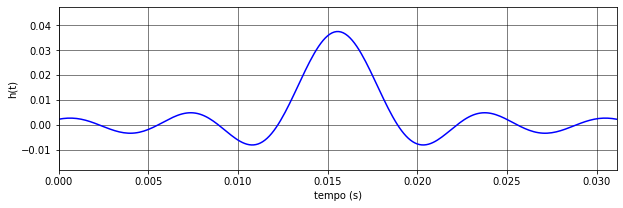

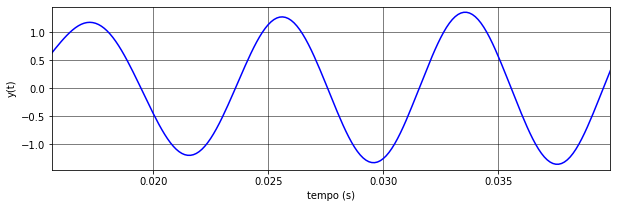

In [158]:
plt.figure()
plt.plot(t, x,'b')
plt.ylim(x.min(0)-0.1, x.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.figure()
plt.plot(th,h,'b')
plt.ylim(h.min(0)-0.01, h.max(0)+0.01)
plt.xlim(0,th.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('h(t)')
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.figure()
plt.plot(ty, y,'b')
plt.ylim(y.min(0) - 0.1, y.max(0) + 0.1)
D = int(np.floor(N/2))
plt.xlim(t[D],t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('y(t)')
plt.grid(color='k', linestyle='-', linewidth=0.5)

Os efeitos da filtragem no domínio da frequência podem ser observados através da seguinte expressão:

$$Y(\Omega)= X(\Omega).H(\Omega).$$

Em que $X(\Omega)$ representa o espectro (Transformada de Fourier) do sinal de entrada, $H(\Omega)$ é a resposta em frequência do filtro e $Y(\Omega)$ é espectro do sinal de filtrado. Observem que o filtro atenua (praticamente elimina) as componentes de frequências acima da frequência de corte do filtro. Observem, também, que esse filtro não é ideal, quanto maior for a ordem do filtro mais semelhante ele será de um filtro ideal.

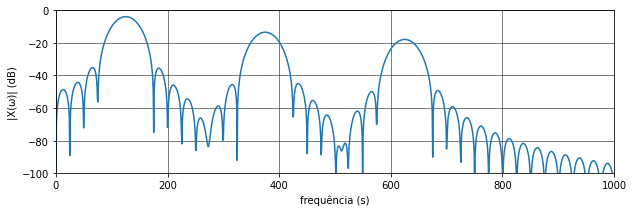

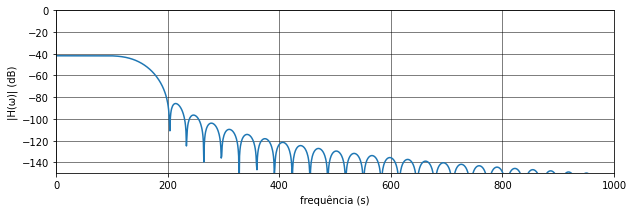

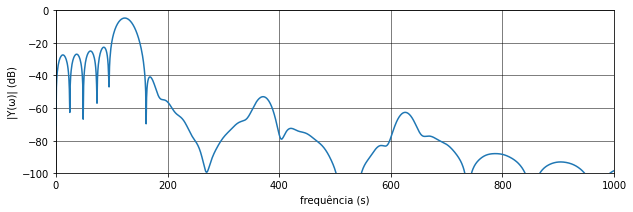

In [160]:
plt.figure()
plt.magnitude_spectrum(x,Fs=fs,scale='dB',label='sinal', pad_to=10000);
plt.ylim(-100, 0)
plt.xlim(0,1000)
plt.xlabel('frequência (s)')
plt.ylabel('|X(ω)| (dB)')
plt.grid(color='k', linestyle='-', linewidth=0.5)


plt.figure()
plt.magnitude_spectrum(h,Fs=fs,scale='dB',label='sinal', pad_to=10000);
plt.ylim(-150, 0)
plt.xlim(0,1000)
plt.xlabel('frequência (s)')
plt.ylabel('|H(ω)| (dB)')
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.figure()
plt.magnitude_spectrum(y,Fs=fs,scale='dB',label='sinal',  pad_to=10000);
plt.ylim(-100, 0)
plt.xlim(0,1000)
plt.xlabel('frequência (s)')
plt.ylabel('|Y(ω)| (dB)')
plt.grid(color='k', linestyle='-', linewidth=0.5)